# Malignant Comments Classifier

### Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour. 


There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.


Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

### Importing Libraries

In [1]:
import pandas as pd # for handling dataset
import numpy as np  # for mathematical computation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the train and test data
df1=pd.read_csv(r'D:\DATATRAINED\Internship-FlipnRobo\Projects by FlipnRobo\Project 5\Malignant Comments Classifier Project\train.csv')
df2=pd.read_csv(r'D:\DATATRAINED\Internship-FlipnRobo\Projects by FlipnRobo\Project 5\Malignant Comments Classifier Project\test.csv')

In [3]:
df1.head() # to display top 5 rows from the train dataset

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


#### Dataset Description

1- ID: It includes unique Ids associated with each comment text given.
    
2- Comment text: This column contains the comments extracted from various social media platforms.  
    
3- Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
    
4- Highly Malignant: It denotes comments that are highly malignant and hurtful.    
    
5- Rude: It denotes comments that are very rude and offensive. 
    
6- Threat: It contains indication of the comments that are giving any threat to someone.   
    
7- Abuse: It is for comments that are abusive in nature.  
    
8- Loathe: It describes the comments which are hateful and loathing in nature.  

In [4]:
df2.head() # to display top 5 rows from the test dataset

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
# to check number of rows & columns in train dataset
print('Total no of rows & columns in train dataset: ',df1.shape) 

# to check number of rows & columns in test dataset
print('Total no of rows & columns in test dataset: ',df2.shape)

Total no of rows & columns in train dataset:  (159571, 8)
Total no of rows & columns in test dataset:  (153164, 2)


In [6]:
# to display names of all the columns in train dataset
print('List of columns in train dataset: ',df1.columns) 

# to display names of all the columns in test dataset
print('List of columns in in test dataset: ',df2.columns)

List of columns in train dataset:  Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')
List of columns in in test dataset:  Index(['id', 'comment_text'], dtype='object')


In [7]:
df1.info() # to know datatype of each columns in train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
df2.info() # to know datatype of each columns in test data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [9]:
df1.describe().T # to get high understanding of train dataset 

,count,mean,std,min,25%,50%,75%,max
malignant,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
highly_malignant,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
rude,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
abuse,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
loathe,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0


In [10]:
df2.describe().T # to get overview/stats of test dataset

,count,unique,top,freq
id,153164,153164,b4877da132eb3a72,1
comment_text,153164,153164,""" \n\n == Indonesia Badminton == \n\n Very wel...",1


In [11]:
df1.isnull().sum()  # to check null values for train data

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

#### No null values

In [12]:
df2.isnull().sum()  # to check null values for test data

id              0
comment_text    0
dtype: int64

#### No null values

## Univariate Analysis

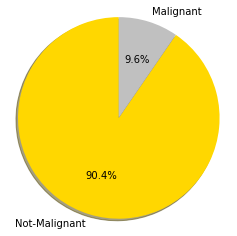

In [13]:
# to visualize column 'malignant' in pie chart

labels = ['Not-Malignant', 'Malignant']
fig, ax = plt.subplots(figsize=(4,4))
colors = ['gold', 'silver']
ax.pie(df1['malignant'].value_counts(),  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Comments which are stated as malignant is 9.6% and rest not-malignant.

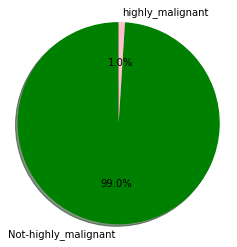

In [14]:
# to visualize column 'highly_malignant' in pie chart

labels = ['Not-highly_malignant', 'highly_malignant']
fig, ax = plt.subplots(figsize=(4,4))
colors = ['green', 'pink']
ax.pie(df1['highly_malignant'].value_counts(),  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Comments which are stated as highly malignant is 1% and rest not-highly malignant.

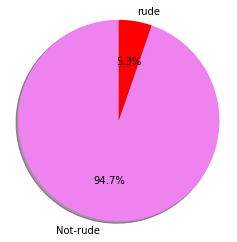

In [15]:
# to visualize column 'rude' in pie chart

labels = ['Not-rude', 'rude']
fig, ax = plt.subplots(figsize=(4,4))
colors = ['violet', 'red']
ax.pie(df1['rude'].value_counts(),  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Comments which are stated as rude is 5.3% and rest not-rude.

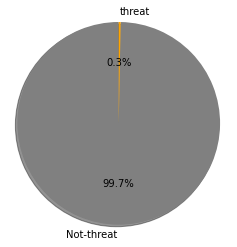

In [16]:
# to visualize column 'threat' in pie chart

labels = ['Not-threat', 'threat']
fig, ax = plt.subplots(figsize=(4,4))
colors = ['grey', 'orange']
ax.pie(df1['threat'].value_counts(),  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Comments which are stated as threat is 0.3% and rest not-threat.

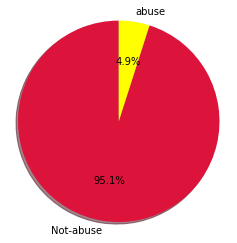

In [17]:
# to visualize column 'abuse' in pie chart

labels = ['Not-abuse', 'abuse']
fig, ax = plt.subplots(figsize=(4,4))
colors = ['crimson', 'yellow']
ax.pie(df1['abuse'].value_counts(),  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Comments which are stated as abuse is 4.9% and rest not-abuse.

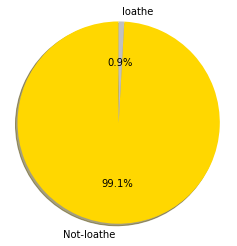

In [18]:
# to visualize column 'loathe' in pie chart

labels = ['Not-loathe', 'loathe']
fig, ax = plt.subplots(figsize=(4,4))
colors = ['gold', 'silver']
ax.pie(df1['loathe'].value_counts(),  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Comments which are stated as loathe is 0.9% and rest 99.1% is not-loathe.

In [19]:
import re

In [20]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy>=1.6.1 in c:\users\nitish\anaconda3\lib\site-packages (from wordcloud) (1.19.2)



In [22]:
import nltk
nltk.download('stopwords')

# download words from wordnet library
nltk.download('wordnet')
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nitish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nitish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [24]:
# defining function text cleaner to use on comment text column
# Convert all comments text into lower case
# remove punctuation from comment text column
# removing stopwords from comment text column
# let's remove digits from the comment text column
# Using Lemmatizing for converting words to its base form

def text_cleaner(text):
    clean_text = re.sub(r'@[A-Za-z0-9]+','',text)
    clean_text = re.sub('#','',clean_text)
    clean_text = re.sub(r"'s\b",'',clean_text)
    clean_text = re.sub(r'[%$#@&}{]','',clean_text)
    clean_text = re.sub(r'[.,:;!]','',clean_text)
    letters_only = re.sub("[^a-zA-Z]",' ',clean_text)
    
    lower_case = letters_only.lower()
    tokens = [w for w in lower_case.split() if not w in stop_words]
    clean_text=''
    for i in tokens:
        clean_text = clean_text + lemmatizer.lemmatize(i)+ ' '
    return clean_text.strip()

In [25]:
cleaned_text=[]
for i in df1['comment_text']:
    cleaned_text.append(text_cleaner(i))

In [26]:
df1['cleaned_comments'] = cleaned_text

In [27]:
df1.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_comments
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww match background colour seemingly stuck th...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,make real suggestion improvement wondered sect...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page


In [28]:
cleaned_text=[]
for i in df2['comment_text']:
    cleaned_text.append(text_cleaner(i))

In [29]:
df2['cleaned_comments'] = cleaned_text

In [30]:
df2.head()

,id,comment_text,cleaned_comments
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful ever whats hating s...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,rfc title fine imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",source zawe ashton lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",look back source information updated correct f...
4,00017695ad8997eb,I don't anonymously edit articles at all.,anonymously edit article


In [31]:
df1=df1.drop(columns=['comment_text','id'])
df2=df2.drop(columns=['comment_text','id'])

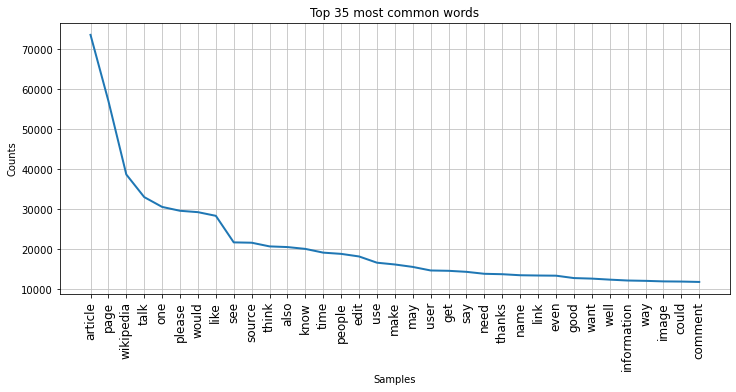

<AxesSubplot:title={'center':'Top 35 most common words'}, xlabel='Samples', ylabel='Counts'>

In [32]:
all_words = []
for line in list(df1['cleaned_comments']):
    words = line.split()
    for word in words:
        all_words.append(word)
plt.figure(figsize =(12,5))
plt.title('Top 35 most common words')
plt.xticks(fontsize = 12, rotation =90)
fd = nltk.FreqDist(all_words)
fd.plot(35, cumulative=False)

#### These are 35 most frequently used common words from the cleaned comments column according to its number of occurences in a descending order.

In [33]:
from wordcloud import WordCloud

## Offensive Words

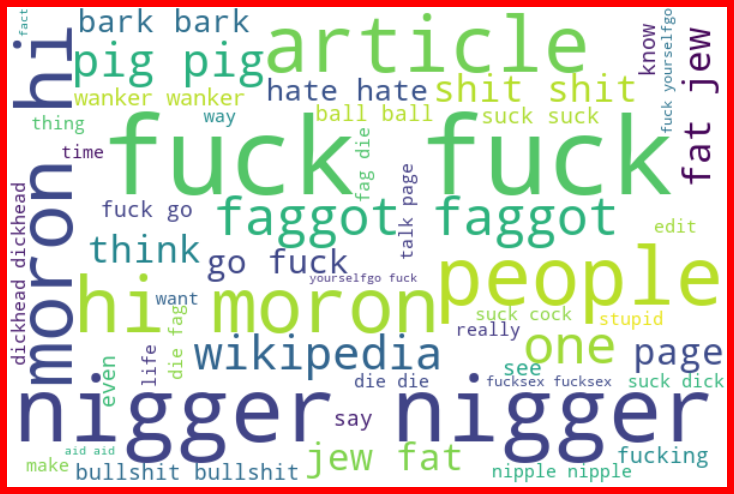

In [34]:
# Getting sense of loud words which are offensive
word = df1['cleaned_comments'][df1['malignant']==1]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='r')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Offensive words appearing more frequently in comment_text column that is termed as malignant. 

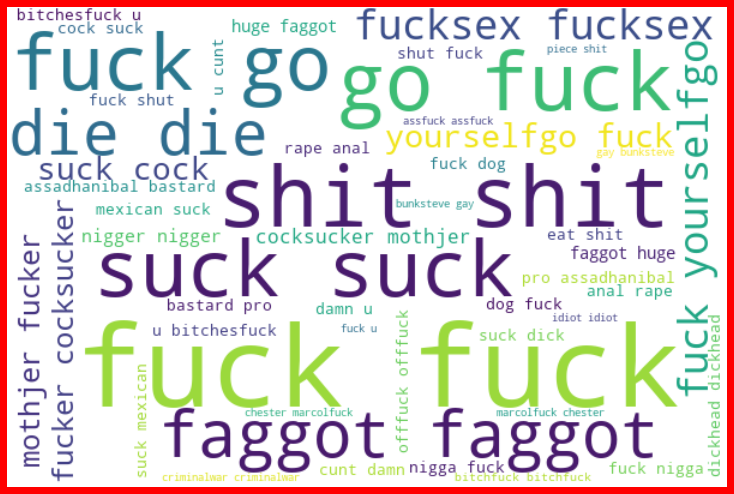

In [35]:
# Getting sense of loud words which are offensive
word = df1['cleaned_comments'][df1['highly_malignant']==1]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='r')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Offensive words appearing more frequently in comment_text column that is termed as highly malignant. 

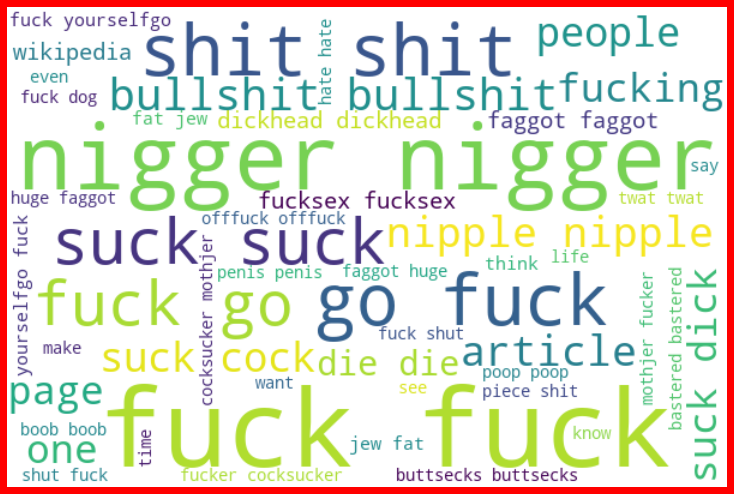

In [36]:
# Getting sense of loud words which are offensive
word = df1['cleaned_comments'][df1['rude']==1]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='r')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Offensive words appearing more frequently in comment_text column that is termed as rude. 

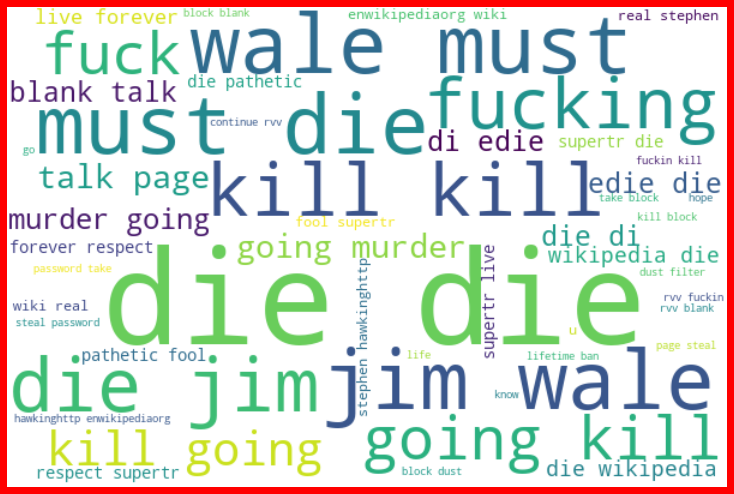

In [37]:
# Getting sense of loud words which are offensive
word = df1['cleaned_comments'][df1['threat']==1]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='r')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Offensive words appearing more frequently in comment_text column that is termed as threat. 

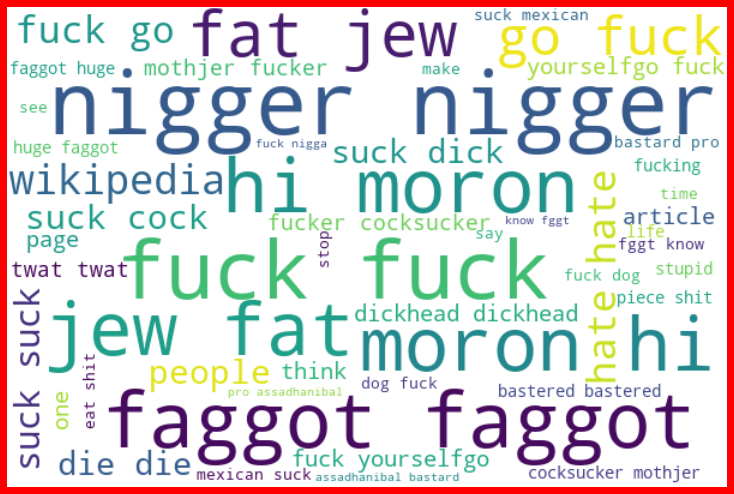

In [38]:
# Getting sense of loud words which are offensive
word = df1['cleaned_comments'][df1['abuse']==1]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='r')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Offensive words appearing more frequently in comment_text column that is termed as abuse.

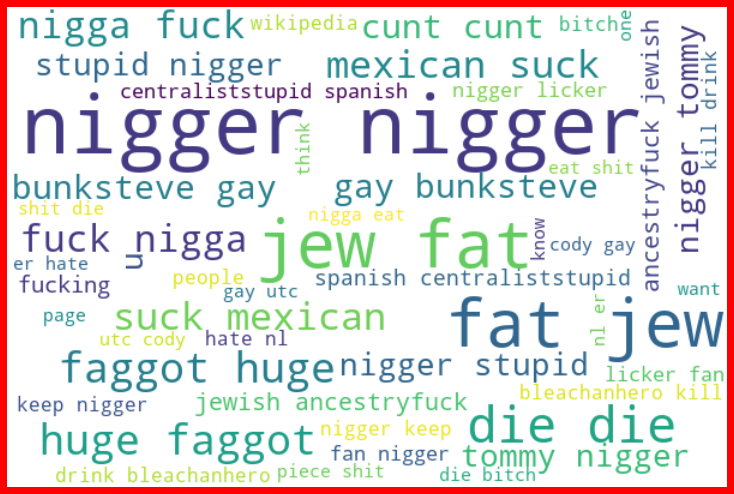

In [39]:
# Getting sense of loud words which are offensive
word = df1['cleaned_comments'][df1['loathe']==1]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='r')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Offensive words appearing more frequently in comment_text column that is termed as loathe.

## Non-Offensive Words

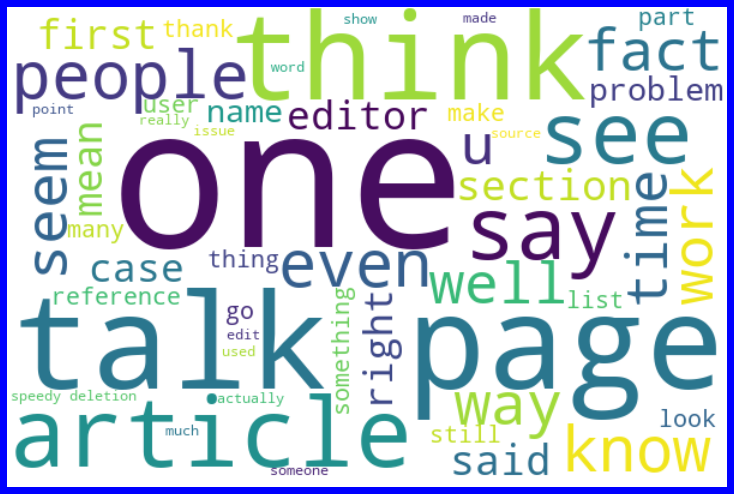

In [40]:
# Getting sense of loud words which are not offensive
word = df1['cleaned_comments'][df1['malignant']==0]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Non-Offensive words appearing more frequently in comment_text column that is termed as malignant.

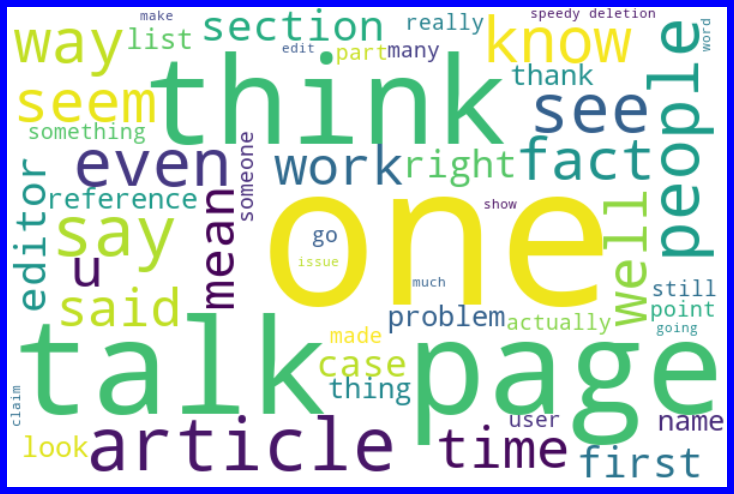

In [41]:
# Getting sense of loud words which are not offensive
word = df1['cleaned_comments'][df1['highly_malignant']==0]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Non-Offensive words appearing more frequently in comment_text column that is termed as highly malignant.

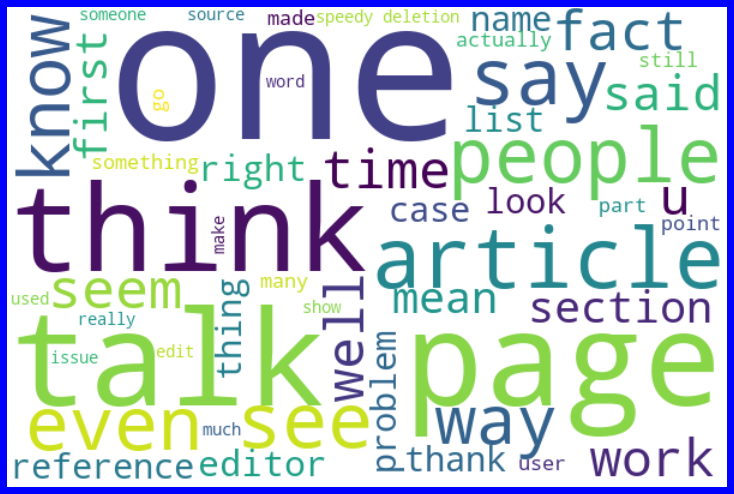

In [42]:
# Getting sense of loud words which are not offensive
word = df1['cleaned_comments'][df1['rude']==0]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Non-Offensive words appearing more frequently in comment_text column that is termed as rude.

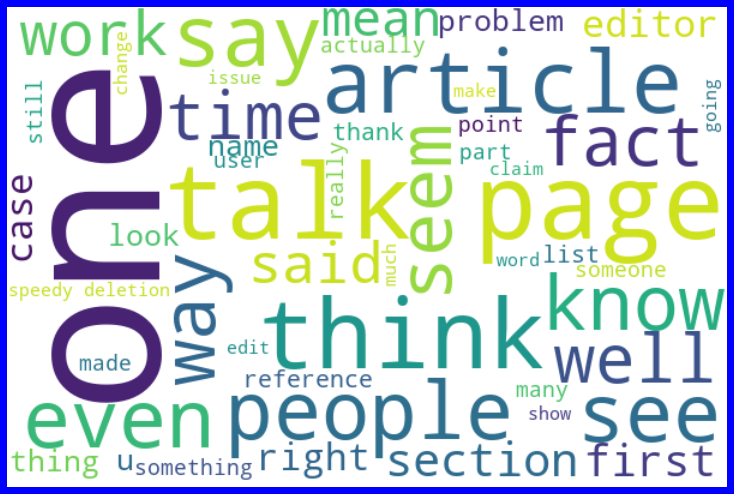

In [43]:
# Getting sense of loud words which are not offensive
word = df1['cleaned_comments'][df1['threat']==0]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Non-Offensive words appearing more frequently in comment_text column that is termed as threat.

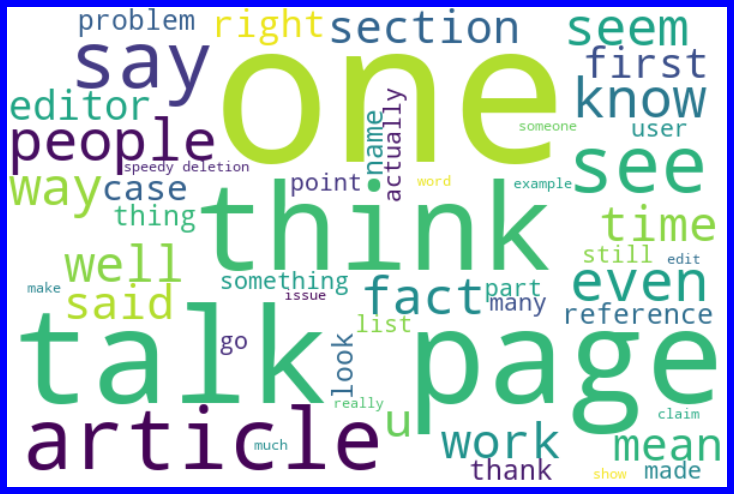

In [44]:
# Getting sense of loud words which are not offensive
word = df1['cleaned_comments'][df1['abuse']==0]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Non-Offensive words appearing more frequently in comment_text column that is termed as abuse.

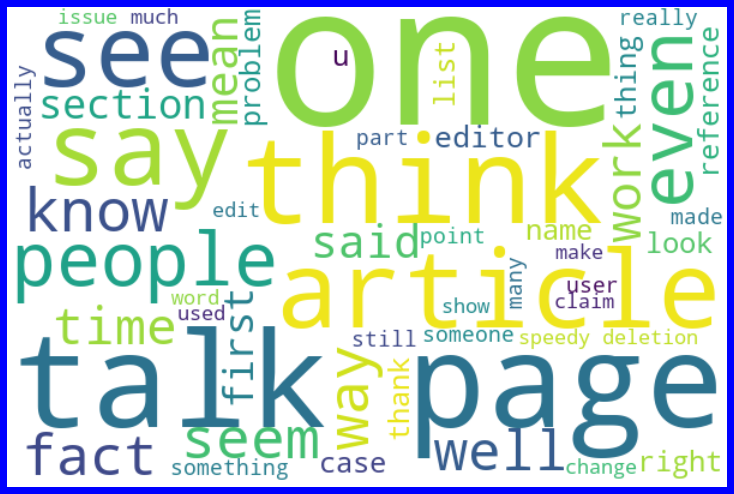

In [45]:
# Getting sense of loud words which are not offensive
word = df1['cleaned_comments'][df1['loathe']==0]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Non-Offensive words appearing more frequently in comment_text column that is termed as loathe.

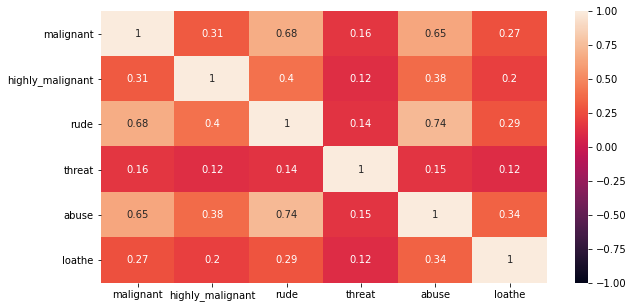

In [47]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [48]:
# create a label feature, which is combination of all target columns.
all_labels = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df1['Label'] = df1[all_labels].sum(axis=1)

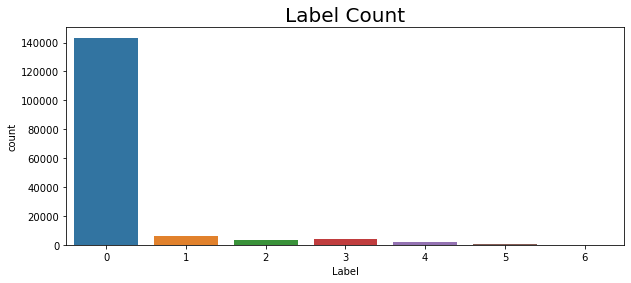

In [54]:
# plot label column count
plt.figure(figsize=(10,4))
sns.countplot(df1['Label'])
plt.title("Label Count",fontsize=20)
plt.show()

In [55]:
# Here, we convert label column in form of 0 and 1 (scaling).
df1['Label'] = df1['Label']>0
df1['Label'] = df1['Label'].astype(int)

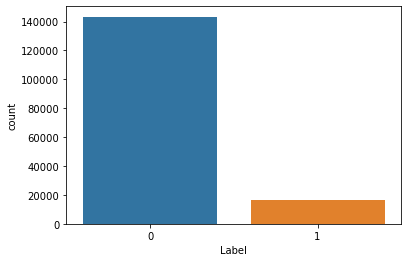

0    143346
1     16225
Name: Label, dtype: int64

In [56]:
# Here, we plot our label column
sns.countplot(df1['Label'])
plt.show()

df1['Label'].value_counts()

In [58]:
# Convert train data texts into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer(max_features=8000, stop_words='english')

features = tf_vec.fit_transform(df1['cleaned_comments'])
X = features
y = df1['Label']

In [59]:
# Convert test data texts into vectors using TF-IDF

tf_vec = TfidfVectorizer(max_features=8000, stop_words='english')
features = tf_vec.fit_transform(df2['cleaned_comments'])

In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [63]:
# Hear, we use SMOTE(resampling) method to cope up with imbalanced classification of target variable.
# SMOTE(Synthetic Minority Oversampling Technique) algorithm generates synthetic samples of minority class.
X_smote,y_smote = smote.fit_resample(X,y)
print(X.shape)
print(y.shape)

# check shape after oversampling  
print(X_smote.shape)
print(y_smote.shape)

(159571, 8000)
(159571,)
(286692, 8000)
(286692,)


In [65]:
# split data into train and test. Model will be build on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=51)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

## LogisticRegression

In [67]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred = log_reg.predict(x_test)

In [69]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9289551155944359

In [76]:
### Cross Validation score to check if the model is overfitting
score= cross_val_score(log_reg,X_smote,y_smote,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.90854392 0.93414604 0.93280198 0.93280198 0.93499948]
0.9286586811888566
0.01009211775945021


In [77]:
# Confusion Matrix
conf_mat =confusion_matrix(y_test,y_pred)
conf_mat

array([[32881,  3013],
       [ 2079, 33700]], dtype=int64)

In [78]:
print('\n----------------Classification Report-------------------')
print (classification_report(y_test,y_pred,digits=2))


----------------Classification Report-------------------
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     35894
           1       0.92      0.94      0.93     35779

    accuracy                           0.93     71673
   macro avg       0.93      0.93      0.93     71673
weighted avg       0.93      0.93      0.93     71673



## DecisionTree Classifier

In [79]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = dt_clf.predict(x_test)  
dt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 99.71%
______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.994555       0.999589  0.997061       0.997072   
recall          0.999591       0.994534  0.997061       0.997062   
f1-score        0.997067       0.997055  0.997061       0.997061   
support    107452.000000  107567.000000  0.997061  215019.000000   

            weighted avg  
precision       0.997073  
recall          0.997061  
f1-score        0.997061  
support    215019.000000  
______________________________________________
Confusion Matrix:
 [[107408     44]
 [   588 106979]]


===================Test Result======================
Accuracy Score: 94.44%
______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.963188      0.927017    0.9444    

In [80]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_clf,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.93065802 0.95055721 0.95120165 0.95057379 0.95160278]
0.9469186884257257
0.008139932356447187


## Random Forest Classifier

In [81]:
rand_clf = RandomForestClassifier(random_state=51)
rand_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
rand_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = rand_clf.predict(x_test)  
rand_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 99.71%
______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.994555       0.999589  0.997061       0.997072   
recall          0.999591       0.994534  0.997061       0.997062   
f1-score        0.997067       0.997055  0.997061       0.997061   
support    107452.000000  107567.000000  0.997061  215019.000000   

            weighted avg  
precision       0.997073  
recall          0.997061  
f1-score        0.997061  
support    215019.000000  
______________________________________________
Confusion Matrix:
 [[107408     44]
 [   588 106979]]


===================Test Result======================
Accuracy Score: 97.52%
______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.985954      0.964784  0.975151    

In [82]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_clf,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.96920072 0.97856607 0.97919355 0.97889707 0.97814713]
0.9768009077163817
0.0038160090749640384


## KNN Classifier

In [83]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_train)
knn_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = knn.predict(x_test)  
knn_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 66.91%
______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.996771       0.602053  0.669146       0.799412   
recall          0.339035       0.998903  0.669146       0.668969   
f1-score        0.505972       0.751292  0.669146       0.628632   
support    107452.000000  107567.000000  0.669146  215019.000000   

            weighted avg  
precision       0.799307  
recall          0.669146  
f1-score        0.628698  
support    215019.000000  
______________________________________________
Confusion Matrix:
 [[ 36430  71022]
 [   118 107449]]


===================Test Result======================
Accuracy Score: 61.50%
______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.992409      0.564735  0.615043    

In [84]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.61448578 0.6193167  0.61878684 0.61678119 0.61728697]
0.6173314946371585
0.0017007046868701863


## Support-Vector Machines

In [85]:
svc = SVC(kernel = 'rbf',C=1)
svc.fit(x_train,y_train)
pred=svc.predict(x_train)
svc_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = svc.predict(x_test)  
svc_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 99.42%
______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.996494       0.992004  0.994238       0.994249   
recall          0.991959       0.996514  0.994238       0.994237   
f1-score        0.994221       0.994254  0.994238       0.994238   
support    107452.000000  107567.000000  0.994238  215019.000000   

            weighted avg  
precision       0.994248  
recall          0.994238  
f1-score        0.994238  
support    215019.000000  
______________________________________________
Confusion Matrix:
 [[106588    864]
 [   375 107192]]


===================Test Result======================
Accuracy Score: 98.50%
______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.986449      0.983613  0.985029    

In [86]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(svc,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.94799351 0.98960568 0.99011127 0.98972758 0.99012871]
0.9815133503115184
0.016761190567076447


## Gradient Boosting Classifier

In [87]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = gbdt_clf.predict(x_test)  
gbdt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 83.45%
______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.763769       0.956617  0.834452       0.860193   
recall          0.968181       0.700866  0.834452       0.834523   
f1-score        0.853912       0.809010  0.834452       0.831461   
support    107452.000000  107567.000000  0.834452  215019.000000   

            weighted avg  
precision       0.860244  
recall          0.834452  
f1-score        0.831449  
support    215019.000000  
______________________________________________
Confusion Matrix:
 [[104033   3419]
 [ 32177  75390]]


===================Test Result======================
Accuracy Score: 83.47%
______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.765917      0.952370  0.834736    

In [88]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(gbdt_clf,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.81757617 0.84012627 0.83522271 0.8353448  0.8393561 ]
0.8335252094511969
0.00822359431317561


## Stochastic Gradient Descent

In [89]:
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9245043461275515

In [90]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(sgd,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.90198643 0.92983833 0.92798842 0.92831979 0.93008127]
0.9236428482864365
0.010859055551869987


In [91]:
accuracy =[92.89,94.44,97.52,61.50,98.50,83.47,92.45]
cross_val_score=[92.86,94.69,97.68,61.73,98.15,83.35,92.36]

model=['Logistic Regression','Decision Tree','Random Forest','KNN','SVM','Gradient','Stochastic']
best_model=pd.DataFrame({'Model':model,'Accuracy':accuracy,'Cross validation score':cross_val_score})
best_model

,Model,Accuracy,Cross validation score
0,Logistic Regression,92.89,92.86
1,Decision Tree,94.44,94.69
2,Random Forest,97.52,97.68
3,KNN,61.50,61.73
4,SVM,98.50,98.15
5,Gradient,83.47,83.35
6,Stochastic,92.45,92.36


#### Logistic Regression is our best model because the difference between its accuracy and CV score is least than other classifier models.

In [93]:
# we are tuning hyperparameters right now, we are passing different values
grid_param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],"penalty":["l1","l2"] }

In [94]:
grid_search = GridSearchCV(estimator=log_reg,
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

In [95]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [96]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 10, 'penalty': 'l2'}


In [97]:
log_reg = LogisticRegression(C =10, penalty='l2')
log_reg.fit(x_train,y_train)

LogisticRegression(C=10)

In [98]:
log_reg.score(x_test,y_test)

0.9349406331533492

In [ ]:
# After doing hyper parameter tuning, accuracy score improves by 0.6%.

## Lets plot ROC AUC Curve to choose the best model

In [99]:
# Plot ROC/AUC for multiple models without hyperparams tuning

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
gbdt = GradientBoostingClassifier()
sgd= SGDClassifier()

In [100]:
# training with all classifier
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)
kn.fit(x_train,y_train)
gbdt.fit(x_train,y_train)
sgd.fit(x_train,y_train)

print('All models are trained')

All models are trained


In [101]:
# All models score captured
lr.fit(x_test,y_test)
rf.fit(x_test,y_test)
dt.fit(x_test,y_test)
kn.fit(x_test,y_test)
gbdt.fit(x_test,y_test)
sgd.fit(x_test,y_test)

print('All models test score captured')

All models test score captured


## Lets find ROC AUC score

In [102]:
# LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.9344069823131347

In [103]:
# DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

0.9973522435473628

In [104]:
# RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.9972903452318223

In [106]:
# KneighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.5859849140630816

In [107]:
# GradientBoostingClassifier
roc_auc_score(y_test,gbdt.predict(x_test))

0.8339862279428764

In [108]:
# SGDClassifier
roc_auc_score(y_test,sgd.predict(x_test))

0.913298699346743

## Lets check ROC AUC curve for the fitted model

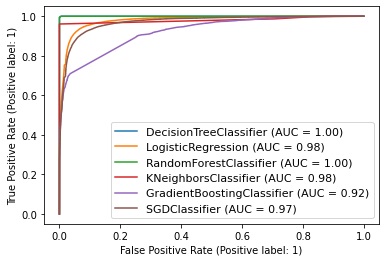

In [109]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(sgd,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

## Model Saving

In [110]:
#save best result
df1 = pd.DataFrame(y_pred)
df1.to_csv("logreg_malignant.csv")
#save best model
import joblib
joblib.dump(sgd,"logreg_malignant.obj")

['logreg_malignant.obj']

In [ ]:
# Model has been saved successfully. Let's check by predicting with the loaded model.

## Loading and predicting with the loaded model

In [112]:
# check our test dataset with best model
test_dataset = log_reg.predict(features)
print(test_dataset)

[0 0 1 ... 0 0 0]


In [113]:
#save test dataset result
df2 = pd.DataFrame(test_dataset)
df2.to_csv("log_reg_malignant_test.csv")